# Q(1) Assignment-05
preparing model for predicting of profit in dataset(50 startups).

In [37]:
 import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import influence_plot

In [78]:
st_df=pd.read_csv('F:\Startups.csv')
st_df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


# EDA Process

In [27]:
st_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


there is no null values in this data 

In [79]:
st_df=st_df.drop('State',axis='columns')
st_df.head()

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [82]:
st_df=st_df.rename({'R&D Spend':'R_D_spend','Marketing Spend':'Market_spend'},axis=1)

In [33]:
st_df.shape

(50, 4)

In [34]:
st_df.describe()

,R_D_spend,Administration,Market_spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [31]:
print(st_df[st_df.duplicated()])

Empty DataFrame
Columns: [R&D Spend, Administration, Marketing Spend, Profit]
Index: []


Hence there is no duplicated values in this data.

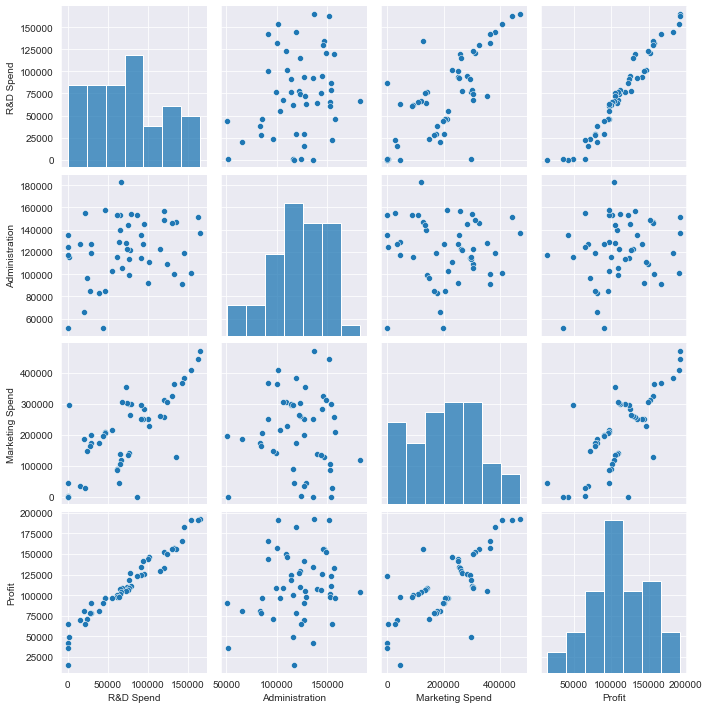

In [9]:
sns.set_style(style='darkgrid')
sns.pairplot(st_df)
plt.show()

<AxesSubplot:>

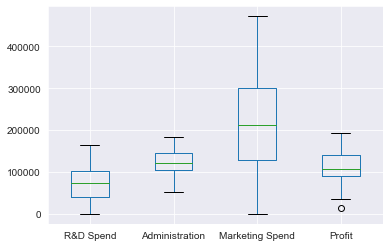

In [10]:
st_df.boxplot()

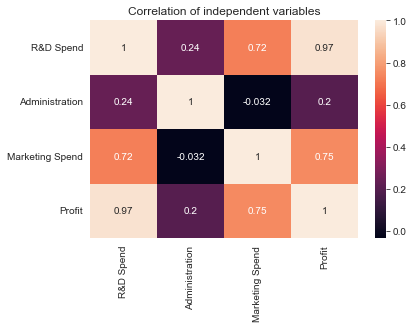

In [11]:
correlations=st_df.corr()
sns.heatmap(correlations,annot=True).set(title='Correlation of independent variables')
plt.show()

In the above graph represents that the colour black  and purple represents that there is very less corelation,where as light orange and white colour represents the more correlation. 

In [35]:
st_df.corr()

,R_D_spend,Administration,Market_spend,Profit
R_D_spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Market_spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


# Model building

In [38]:
model=smf.ols('Profit~Administration+R_D_spend+Market_spend',data=st_df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Thu, 26 Jan 2023   Prob (F-statistic):           4.53e-30
Time:                        17:19:26   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
Administration    -0.0268      0.051     -0.526      0.602      -0.130       0.076
R_D_spend          0.8057      0.045     17.846      0.000       0.715       0.897
Market_spend       0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Observation:
-->In the above model observed that R^2 value is near to 1 that show model model is very good but 'Administration' and 'Marketing_spend' are more than the signifiance levelso that there is improvement of model by treating the independent variables.

-->Now preparing a model for individual independednt variables.

In [42]:
model1=smf.ols('Profit~Administration',data=st_df).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     2.015
Date:                Thu, 26 Jan 2023   Prob (F-statistic):              0.162
Time:                        19:08:01   Log-Likelihood:                -599.63
No. Observations:                  50   AIC:                             1203.
Df Residuals:                      48   BIC:                             1207.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       7.697e+04   2.53e+04      3.040      0.004    2.61e+04    1.28e+05
Administration     0.2887      0.203      1.419      0.162      -0.120       0.698
==============================================================================
Omnibus:                        0.126   Durbin-Watson:                   0.099
Prob(Omnibus):                  0.939   Jarque-Bera (JB):                0.110
Skew:                           0.093   Prob(JB):                        0.947
Kurtosis:                       2.866   Cond. No.                     5.59e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.59e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [45]:
model2=smf.ols('Profit~Market_spend',data=st_df).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     60.88
Date:                Thu, 26 Jan 2023   Prob (F-statistic):           4.38e-10
Time:                        19:09:25   Log-Likelihood:                -580.18
No. Observations:                  50   AIC:                             1164.
Df Residuals:                      48   BIC:                             1168.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept         6e+04   7684.530      7.808      0.000    4.46e+04    7.55e+04
Market_spend     0.2465      0.032      7.803      0.000       0.183       0.310
==============================================================================
Omnibus:                        4.420   Durbin-Watson:                   1.178
Prob(Omnibus):                  0.110   Jarque-Bera (JB):                3.882
Skew:                          -0.336   Prob(JB):                        0.144
Kurtosis:                       4.188   Cond. No.                     4.89e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.89e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [46]:
model3=smf.ols('Profit~Administration+Market_spend',data=st_df).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.610
Model:                            OLS   Adj. R-squared:                  0.593
Method:                 Least Squares   F-statistic:                     36.71
Date:                Thu, 26 Jan 2023   Prob (F-statistic):           2.50e-10
Time:                        19:10:58   Log-Likelihood:                -577.13
No. Observations:                  50   AIC:                             1160.
Df Residuals:                      47   BIC:                             1166.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       2.022e+04   1.77e+04      1.143      0.259   -1.54e+04    5.58e+04
Administration     0.3237      0.131      2.468      0.017       0.060       0.588
Market_spend       0.2488      0.030      8.281      0.000       0.188       0.309
==============================================================================
Omnibus:                        6.584   Durbin-Watson:                   1.279
Prob(Omnibus):                  0.037   Jarque-Bera (JB):                6.524
Skew:                          -0.512   Prob(JB):                       0.0383
Kurtosis:                       4.443   Cond. No.                     1.30e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.3e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

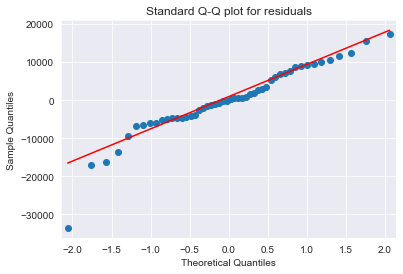

In [55]:
fig=sm.qqplot(model.resid,line='q')
plt.title('Standard Q-Q plot for residuals')
plt.show()

In [64]:
list(np.where(model.resid<-20000))

[array([49], dtype=int64)]

In [65]:
list(np.where(model.resid>20000))

[array([], dtype=int64)]

In [74]:
#here there is one influencer or outlier is detected from the graph Q-Q plot as plotted above.
st_df[st_df.index.isin([49])]
#st_df

,R&D Spend,Administration,Marketing Spend,Profit
49,0.0,116983.8,45173.06,14681.4


In [104]:
st_df_1=st_df.drop(st_df.index[[49]],axis=0).reset_index(drop=True)
st_df_1.tail()

,R_D_spend,Administration,Market_spend,Profit
44,22177.74,154806.14,28334.72,65200.33
45,1000.23,124153.04,1903.93,64926.08
46,1315.46,115816.21,297114.46,49490.75
47,0.00,135426.92,0.00,42559.73
48,542.05,51743.15,0.00,35673.41


# Again Rebiulding the model

In [91]:
model_1=smf.ols('Profit~R_D_spend+Market_spend+Administration',data=st_df_1).fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     372.8
Date:                Thu, 26 Jan 2023   Prob (F-statistic):           8.85e-32
Time:                        19:58:21   Log-Likelihood:                -506.28
No. Observations:                  49   AIC:                             1021.
Df Residuals:                      45   BIC:                             1028.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       5.238e+04   5542.657      9.451      0.000    4.12e+04    6.35e+04
R_D_spend          0.7830      0.038     20.470      0.000       0.706       0.860
Market_spend       0.0252      0.014      1.825      0.075      -0.003       0.053
Administration    -0.0222      0.043     -0.518      0.607      -0.109       0.064
==============================================================================
Omnibus:                        0.082   Durbin-Watson:                   1.598
Prob(Omnibus):                  0.960   Jarque-Bera (JB):                0.232
Skew:                          -0.082   Prob(JB):                        0.890
Kurtosis:                       2.706   Cond. No.                     1.41e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.41e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Model Deletion Diagnostic
Checking multicolinearity

In [94]:
rsq_administration=smf.ols('Administration~R_D_spend+Market_spend',data=st_df_1).fit().rsquared
vif_administration=1/(1-rsq_administration)

rsq_R_D_spend=smf.ols('R_D_spend~Administration+Market_spend',data=st_df_1).fit().rsquared
vif_R_D_spend=1/(1-rsq_R_D_spend)

rsq_Market_spend=smf.ols('Market_spend~Administration+R_D_spend',data=st_df_1).fit().rsquared
vif_Market_spend=1/(1-rsq_Market_spend)

#all variables are storing in one dataframe.
d1={'variables':['Administration','R_D_spend','Market_spend'],'VIF':[vif_administration,vif_R_D_spend,vif_Market_spend]}
VIF_val=pd.DataFrame(d1)
VIF_val

,variables,VIF
0,Administration,1.175172
1,R_D_spend,2.377754
2,Market_spend,2.239957


eval_env: 1


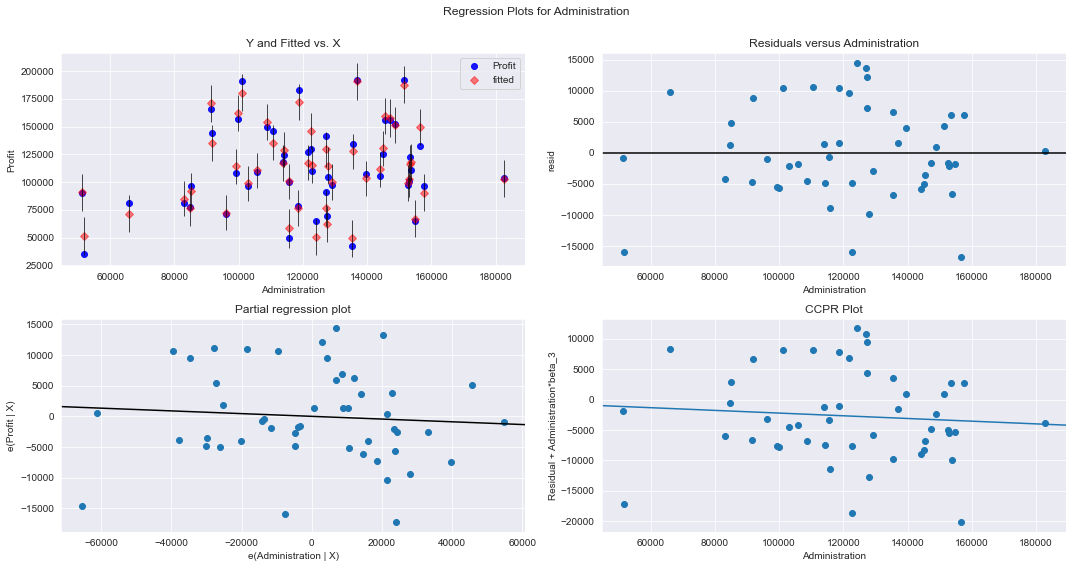

In [95]:
# regressor vs Residuals
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model_1, "Administration", fig=fig)
plt.show()

eval_env: 1


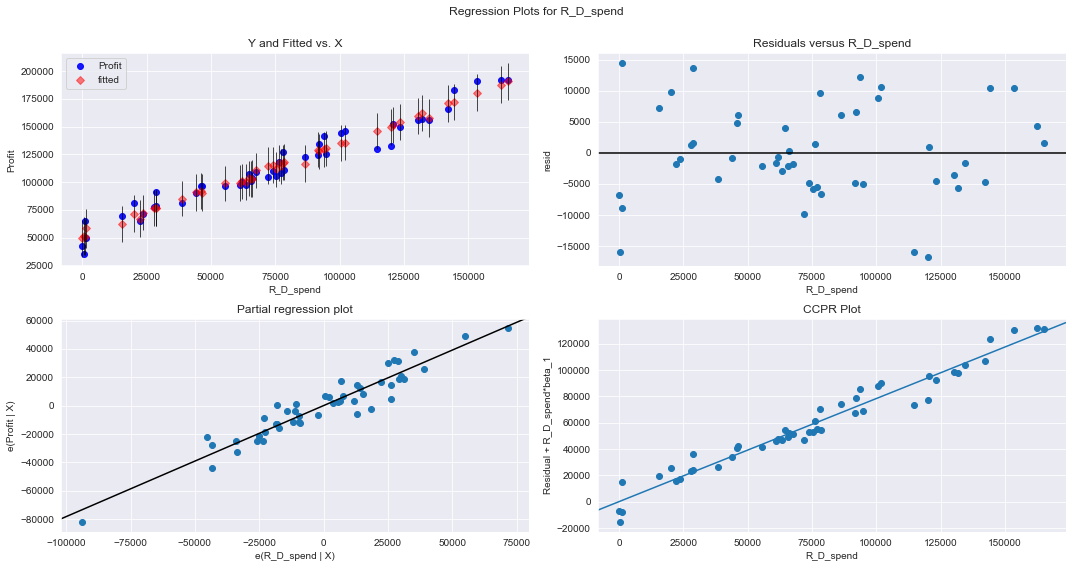

In [96]:
# regressor vs Residuals
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model_1, "R_D_spend", fig=fig)
plt.show()

eval_env: 1


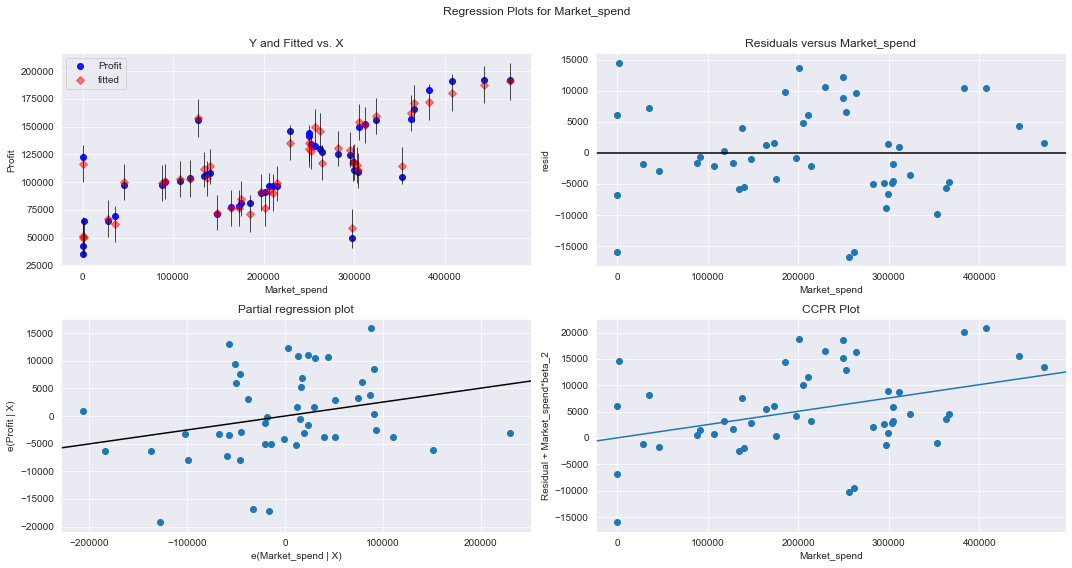

In [97]:
# regressor vs Residuals
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model_1, "Market_spend", fig=fig)
plt.show()

In [101]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance 

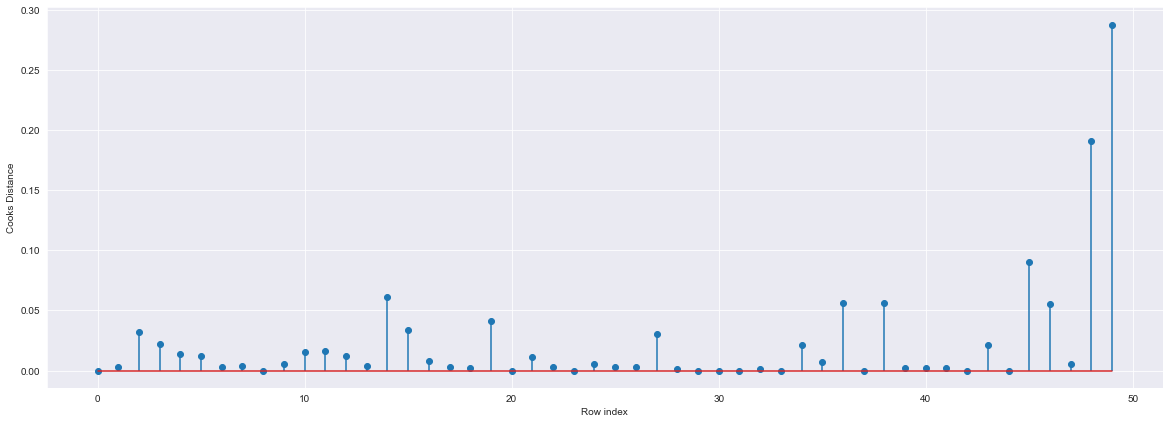

In [108]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(st_df)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [109]:
(np.argmax(c),np.max(c))

(49, 0.28808229275432656)

In [111]:
k = st_df_1.shape[1]
n = st_df_1.shape[0]
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff

0.30612244897959184

In [113]:
model_1.predict(st_df_1).head()

0    190716.676999
1    187537.122227
2    180575.526396
3    172461.144642
4    170863.486721
dtype: float64